In [38]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [119]:
def add_random_objects(inventory, incoming=1):
    for k, v in inventory.items():
        for n in range(incoming):
            obj = np.random.randint(0, 3)
            if obj != k:
                v.append(obj)
    return inventory

In [120]:
def load_shared_truck(storage, boot):
    if len(boot) == 0:
        # try fill to capacity
        free_space = truck_capacity - len(boot)
        while free_space > 0 and len(storage) > 0:
            counts = np.bincount(storage, minlength=3)
            amax = np.argmax(counts)
            if counts[amax] <= free_space:
                for i in range(counts[amax]):
                    storage.remove(amax)
                    boot.append(amax)
            else:
                for i in range(free_space):
                    storage.remove(amax)
                    boot.append(amax)

            free_space = truck_capacity - len(boot)

    else:
        free_space = truck_capacity - len(boot)

        while free_space > 0 and len(storage) > 0:
            # print(free_space, len(storage))

            counts = np.bincount(storage, minlength=3)
            amax = np.argmax(counts)
            boot_elements = np.bincount(boot, minlength=3)
            boot_amax = np.argmax(boot_elements)

            if counts[boot_amax] == 0:
                if counts[amax] <= free_space:
                    for i in range(counts[amax]):
                        storage.remove(amax)
                        boot.append(amax)
                else:
                    for i in range(free_space):
                        storage.remove(amax)
                        boot.append(amax)

            elif counts[boot_amax] <= free_space:
                for i in range(counts[boot_amax]):
                    storage.remove(boot_amax)
                    boot.append(boot_amax)
            elif counts[boot_amax] > free_space:
                for i in range(free_space):
                    # print(boot_amax, boot, storage)
                    storage.remove(boot_amax)
                    boot.append(boot_amax)

            free_space = truck_capacity - len(boot)

    return storage, boot

In [204]:
# three nodes A, B, C with connecting links between them
nodes = [0, 1, 2]

initial_inventory_size = 100
truck_capacity = 10
truck_locations = [0, 2, 1]

inventory = {}

for node in nodes:
    inventory[node] = []
    for i in range(initial_inventory_size):
        obj = np.random.randint(0, 3)
        if obj != node:
            inventory[node].append(obj)

trucks = {
    0: [],
    1: [],
    2: []
}

tmap = {
    0: {0: 1, 1: 0},
    1: {0: 2, 2: 0},
    2: {1: 2, 2: 1}
}

M0 = {}

iterations = 1000

In [205]:
for t in range(iterations):
    initial_inventory_size = np.sum([len(inventory[node]) for node in nodes])
    
    # fill trucks
    for truck, boot in trucks.items():
        node = truck_locations[truck]
        destination = tmap[truck][node]
        
        for obj in inventory[node]:
            if obj == destination:
                inventory[node].remove(obj)
                boot.append(obj)
            if len(boot) == truck_capacity:
                break
        if len(boot) > truck_capacity:
            print("error")
    
    empty_spots = np.sum([truck_capacity - len(boot) for boot in trucks.values()])
    inventory_size = np.sum([len(inventory[node]) for node in nodes])
    
    # move trucks
    truck_locations = [tmap[truck][origin] for truck, origin in enumerate(truck_locations)]
    # print(truck_locations)
    
    # unload trucks
    for truck, boot in trucks.items():
        node = truck_locations[truck]
        
        counter = 0
        for obj in boot:
            boot.pop()
    
    sum_loaded_objs = initial_inventory_size - inventory_size
    
    # grow inventory
    inventory = add_random_objects(inventory, incoming=10)
    
    M0[t] = {
        "empty_spots": empty_spots,
        "inventory_size": inventory_size,
        "loaded": sum_loaded_objs
    }

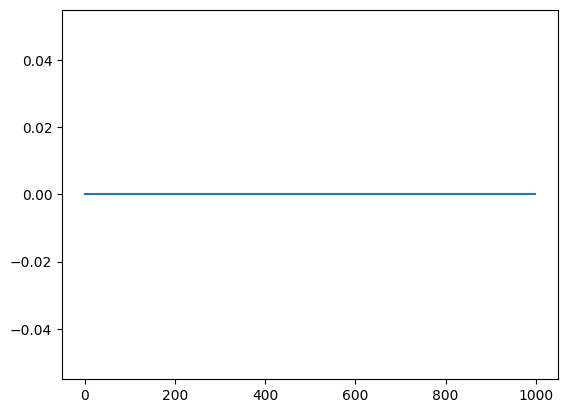

In [206]:
plt.plot([M0[t]["empty_spots"] for t in M0.keys()])

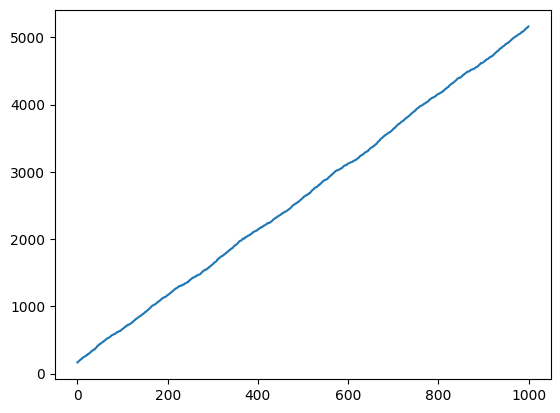

In [207]:
plt.plot([M0[t]["inventory_size"] for t in M0.keys()])

In [238]:
# three nodes A, B, C with connecting links between them
nodes = [0, 1, 2]

initial_inventory_size = 100
truck_capacity = 10
truck_locations = [0, 2, 1]

inventory = {}

for node in nodes:
    inventory[node] = []
    for i in range(initial_inventory_size):
        obj = np.random.randint(0, 3)
        if obj != node:
            inventory[node].append(obj)

trucks = {
    0: [],
    1: [],
    2: []
}

tmap = {
    0: {0: 1, 1: 0},
    1: {0: 2, 2: 0},
    2: {1: 2, 2: 1}
}

M1 = {}

iterations = 1000

In [239]:
iterations = 1000

for t in tqdm(range(iterations, 2 * iterations)):
    
    initial_inventory_size = np.sum([len(inventory[node]) for node in nodes])
    
    # fill trucks
    for truck, boot in trucks.items():
        node = truck_locations[truck]
        inventory[node], boot = load_shared_truck(inventory[node], boot)

    empty_spots = np.sum([truck_capacity - len(boot) for boot in trucks.values()])
    inventory_size = np.sum([len(inventory[node]) for node in nodes])

    # move trucks
    truck_locations = [np.argmax(np.bincount(boot, minlength=3)) for truck, boot in trucks.items()]
    # print(truck_locations)
    # print(trucks)

    # unload trucks
    for truck, boot in trucks.items():
        node = truck_locations[truck]
        tmp = []
        for i in range(len(boot)):
            obj = boot.pop()
            if obj != node:
                tmp.append(obj)
        for obj in tmp:
            boot.append(obj)
    
    sum_loaded_objs = initial_inventory_size - inventory_size
    
    # grow inventory
    inventory = add_random_objects(inventory, incoming=20)

    M1[t] = {
        "empty_spots": empty_spots,
        "inventory_size": inventory_size,
        "loaded": sum_loaded_objs
    }

  0%|          | 0/1000 [00:00<?, ?it/s]

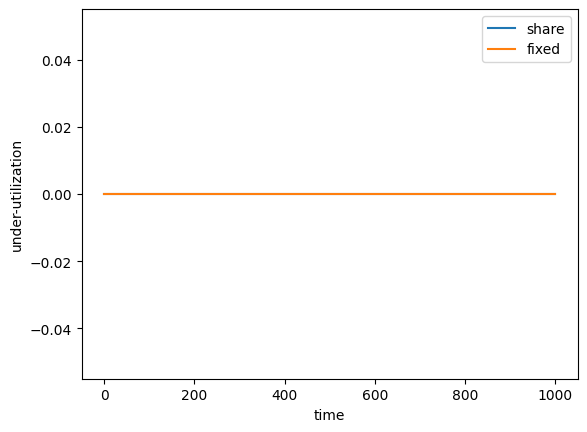

In [240]:
plt.plot([M1[t]["empty_spots"] for t in M1.keys()], label="share")
plt.plot([M0[t]["empty_spots"] for t in M0.keys()], label="fixed")
plt.ylabel("under-utilization")
plt.xlabel("time")
plt.legend()

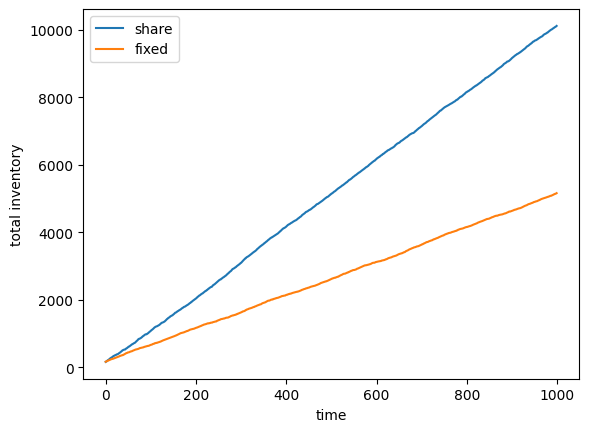

In [241]:
plt.plot([M1[t]["inventory_size"] for t in M1.keys()], label="share")
plt.plot([M0[t]["inventory_size"] for t in M0.keys()], label="fixed")
plt.ylabel("total inventory")
plt.xlabel("time")
plt.legend()

In [242]:
fixed_spots = np.array([M0[t]["empty_spots"] for t in M0.keys()])
share_spots = np.array([M1[t]["empty_spots"] for t in M1.keys()])

fixed_loaded = np.array([M0[t]["loaded"] for t in M0.keys()])
share_loaded = np.array([M1[t]["loaded"] for t in M1.keys()])

fixed_size = np.array([M0[t]["inventory_size"] for t in M0.keys()])
share_size = np.array([M1[t]["inventory_size"] for t in M1.keys()])

In [243]:
fixed_efficiency = fixed_spots/(3*truck_capacity) * fixed_loaded/(3*truck_capacity)
share_efficiency = share_spots/(3*truck_capacity) * share_loaded/(3*truck_capacity)

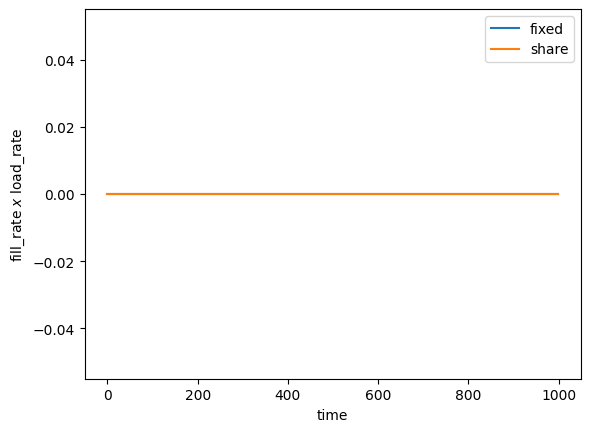

In [244]:
plt.plot(fixed_efficiency, label="fixed")
plt.plot(share_efficiency, label="share")
plt.ylabel(r"fill_rate $x$ load_rate")
plt.xlabel("time")
plt.legend()